## **Maestría en Inteligencia Artificial Aplicada**

### **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey

## **Adtividad Reto 1**

**Integrantes del equipo:**

* Giovanni Andrés Acuña Morales. Matrícula **A01794007**
* Luis Eduardo Rojas Zepeda Matrícula **A01794121**

# Limpieza de base de datos.

Instalamos libreria de mapas *GeoPandas*

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importamos Librerias

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, geopandas as gpd, os, math, zipfile, requests, warnings

from urllib3.exceptions import InsecureRequestWarning
from urllib3 import disable_warnings


from io import BytesIO
from google.colab import drive
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn import svm, datasets, tree
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.metrics import confusion_matrix, recall_score, classification_report, make_scorer
from sklearn.preprocessing import QuantileTransformer, power_transform, MinMaxScaler, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import learning_curve, validation_curve, cross_validate, RepeatedStratifiedKFold, GridSearchCV, train_test_split, RepeatedKFold

Tomamos la base de datos de ***Monitoreo de Aguas Subterraneas***

In [3]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

response = requests.get(url)

zipfile.ZipFile(BytesIO(response.content)).extractall('unzipped_zip/')
df_sub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df_sub.head(10)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.244800,23.451380,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
5,DLBAJ108,POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.220670,23.464930,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
7,DLBAJ111,VICTOR HUGO CESEÑA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,CABO SAN LUCAS,POZO,-109.907306,22.890500,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
9,DLBAJ118,SAN ANTONIO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-110.054722,23.824722,2020,...,NO,NO,SI,NO,SI,SI,SI,SI,NO,NO


## Exploramos los datos

### Describe

Analizamos el DataFrame

In [4]:
df_sub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [5]:
df_sub.shape

(1068, 57)

In [6]:
df_sub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [7]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Con la información del DataFrame podemos identificar y separar las columnas **Categoricas** y **No Categoricas**.

In [8]:
print(f'Columnas Categoricas')
print(f"{df_sub[['ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']].columns}\n")

print(f'Columnas No Categoricas')
print(f"{df_sub[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']].columns}\n")

print(f'Otras columnas')
print(f"CLAVE, SITIO, LONGITUD, LATITUD, PERIODO, CONTAMINANTES")

Columnas Categoricas
Index(['ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO',
       'CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin',
       'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3',
       'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB',
       'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE'],
      dtype='object')

Columnas No Categoricas
Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L',
       'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L',
       'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L',
       'MN_TOT_mg/L', 'FE_TOT_mg/L'],
      dtype='object'

In [9]:
df_limpio = df_sub[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in columnas_numericas:
  df_limpio[i].value_counts()

In [10]:
df_limpio['ALC_mg/L'].value_counts()

157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64

### Box Plot

Ahora empezamos a analizar la columna "**Semaforo**" Atraves de una gráfica

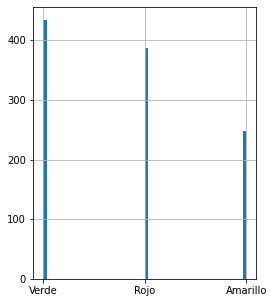

In [11]:
df_semaforo = pd.DataFrame(df_sub['SEMAFORO'])
df_semaforo
df_semaforo['SEMAFORO'].hist(bins = 60, figsize=(4,5))

Ahora eliminamos el simbolo Menor que de las columnas Númericas para convertirlas en tipo flotantes.

In [12]:
warnings.filterwarnings("ignore")

for name in columnas_numericas:
  df_limpio[name] = df_limpio[name].astype('str')
  df_limpio[name] = df_limpio[name].str.replace('<25','25') 
  df_limpio[name] = df_limpio[name].str.replace('<0.2','0.2') 
  df_limpio[name] = df_limpio[name].str.replace('<20','20') 
  df_limpio[name] = df_limpio[name].str.replace('<1.1','1.1')
  df_limpio[name] = df_limpio[name].str.replace('<0.02','0.02') 
  df_limpio[name] = df_limpio[name].str.replace('<0.01','0.01') 
  df_limpio[name] = df_limpio[name].str.replace('<0.003','0.003')
  df_limpio[name] = df_limpio[name].str.replace('<0.005','0.004') 
  df_limpio[name] = df_limpio[name].str.replace('<0.0005','0.0004') 
  df_limpio[name] = df_limpio[name].str.replace('<0.0015','0.0015') 
  df_limpio[name] = df_limpio[name].str.replace('<0.025','0.025')  
  df_limpio[name]= df_limpio[name].astype('float')

df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


Eliminamos la columna **SDT_mg/L** que está vácia

In [13]:
df_limpio.drop('SDT_mg/L', axis=1, inplace=True)

Comprobamos la eliminación de la columna

In [14]:
df_limpio.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

### Mean

Ahora obtenemos las imputaciones y lo realizaremos atravez de la media, con el objetivo de reducir el volumen de información.

In [15]:
for name_column in df_limpio.columns:
  mediana = df_limpio[name_column].median() 
  df_limpio[name_column]= df_limpio[name_column].replace(np.nan, mediana)

df_limpio.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


Identificar medidas de posición no centrales , los cuartiles , outliers. Identificar correlaciones. Preparar los datos

In [16]:
df_limpio.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.217212,0.079572,0.068860,0.243404,-0.016338,-0.000346,0.073458,0.032706,-0.014234,0.069779,0.016989,0.129942,0.043454
CONDUCT_mS/cm,0.217212,1.000000,0.286244,-0.025071,0.692656,0.018021,0.219881,-0.005047,0.029083,0.004436,0.057007,0.024816,0.095940,0.083172
SDT_M_mg/L,0.079572,0.286244,1.000000,-0.013709,0.347211,-0.001102,0.101522,-0.010092,0.010807,-0.000494,0.020332,0.002517,0.018963,0.020103
FLUORUROS_mg/L,0.068860,-0.025071,-0.013709,1.000000,-0.149549,0.003564,-0.019672,0.444079,-0.015123,-0.005205,-0.028597,-0.034191,-0.049742,-0.009994
DUR_mg/L,0.243404,0.692656,0.347211,-0.149549,1.000000,0.031772,0.301581,-0.106417,0.025010,0.007317,0.064998,-0.017304,0.083868,0.059789
COLI_FEC_NMP/100_mL,-0.016338,0.018021,-0.001102,0.003564,0.031772,1.000000,-0.000926,0.038151,-0.001656,-0.008938,-0.008903,0.021451,-0.005326,0.003045
N_NO3_mg/L,-0.000346,0.219881,0.101522,-0.019672,0.301581,-0.000926,1.000000,-0.007950,-0.009353,-0.015157,0.011367,-0.017317,-0.036810,0.013307
AS_TOT_mg/L,0.073458,-0.005047,-0.010092,0.444079,-0.106417,0.038151,-0.007950,1.000000,-0.009078,-0.009698,-0.012593,-0.023608,0.016916,0.014295
CD_TOT_mg/L,0.032706,0.029083,0.010807,-0.015123,0.025010,-0.001656,-0.009353,-0.009078,1.000000,-0.001824,-0.004631,-0.003080,-0.004205,-0.001036
CR_TOT_mg/L,-0.014234,0.004436,-0.000494,-0.005205,0.007317,-0.008938,-0.015157,-0.009698,-0.001824,1.000000,0.006998,-0.001149,-0.005112,0.000610


Ahora Graficamos un BoxPlot para mostrar los outliers

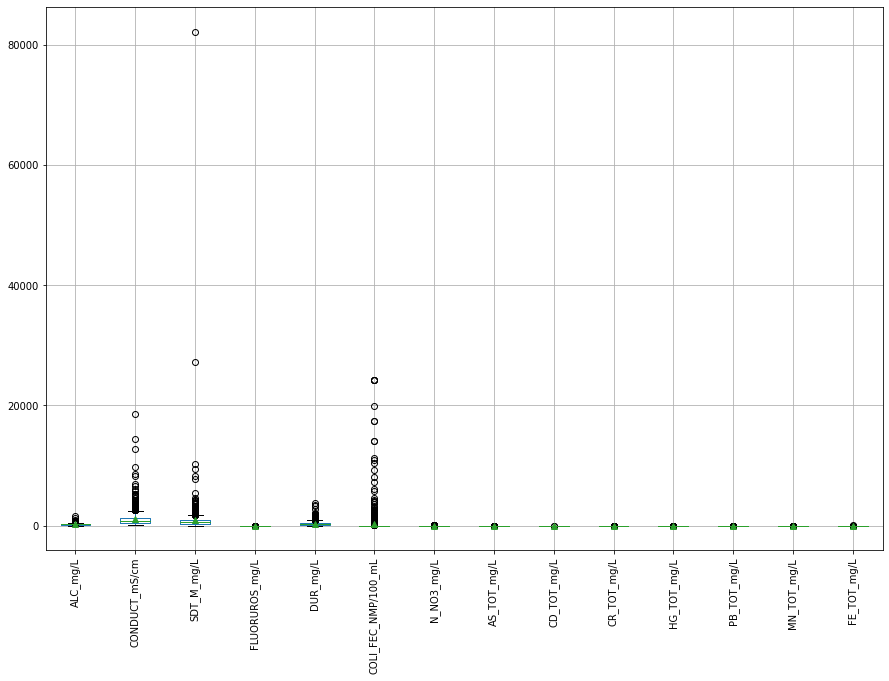

In [17]:
outliers = df_limpio.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

Mediante la grafica del boxplot no se puede identificar los valores ya que hay campos dispersos, por lo que usaremos un mapa de calor

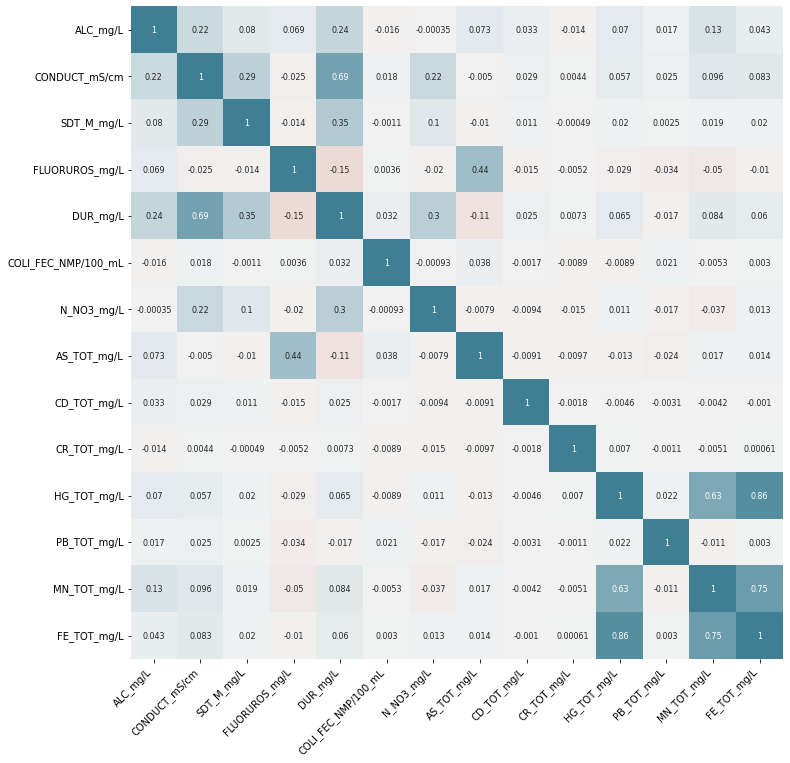

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
mi_correlacion = df_limpio.corr()

sns.heatmap(
    mi_correlacion,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

## Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

En base de la información de latitud y longitud de la base de datos se evidencia que dicha ubicación corresponde al país de México.

In [19]:
df_ubicacion = df_sub[['LONGITUD','LATITUD']]
print(f"{df_ubicacion.sample(10)}\n")
print(f"{df_semaforo.sample(10)}\n")

       LONGITUD    LATITUD
273  -99.733256  19.290975
159 -103.989040  19.021290
473 -100.752870  21.851800
258 -104.053280  23.987230
563 -102.496880  22.722280
647 -104.329580  26.367150
819 -111.013280  29.151530
497 -100.842250  22.152806
588 -102.510580  23.704640
718  -97.359380  19.377280

     SEMAFORO
688      Rojo
862      Rojo
833     Verde
349  Amarillo
916  Amarillo
629     Verde
584      Rojo
834      Rojo
944     Verde
554     Verde



Y ahora aplicamos la geolocalización en el plano geografico de México

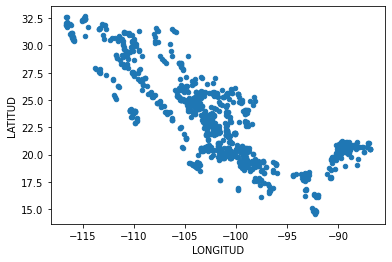

In [20]:
df_ubicacion.plot.scatter('LONGITUD','LATITUD')

Cómo no tenemos el croquis o el mapa de México, necesitamos crear una lista donde almacenará la información de Latitud y longitud

In [21]:
df_ubicacion["COORDENADAS"] = list(zip(df_ubicacion.LONGITUD, df_ubicacion.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion.head()


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


Y ahora agregaremos la lista creada al mapa diseñado previamente

,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


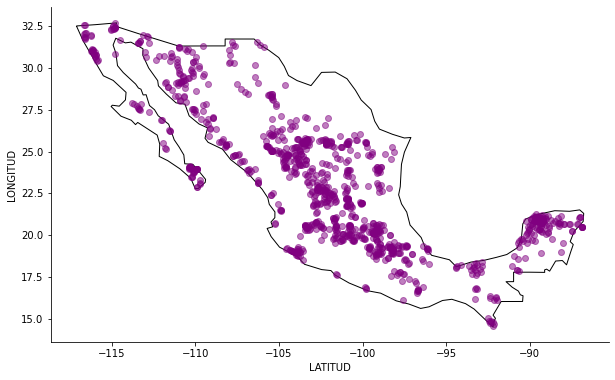

In [22]:
puntos_en_mapa = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
puntos_en_mapa.plot(ax=gax, color='purple', alpha = 0.5)
puntos_en_mapa

Ahora agruparemos los puntos o ubicaciones y se difenciarán uno del otro por colores

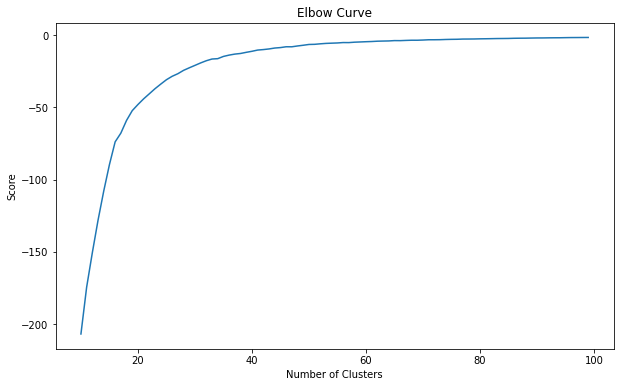

In [28]:
numero_de_closters = range(10,100) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_ubicacion[['LATITUD']]
X_axis = df_ubicacion[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Con la gráfica anterior podemos evidecia que el punto de inflexión se encuentra en el cluster número 3, y con esto crearemos los Kmeans

In [29]:
X = df_sub[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=20).fit(X)
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,Coordinates
0,-99.255412,19.807499,POINT (-99.25541 19.80750)
1,-112.807989,31.281434,POINT (-112.80799 31.28143)
2,-106.211481,24.466249,POINT (-106.21148 24.46625)
3,-89.188374,20.546897,POINT (-89.18837 20.54690)
4,-102.493113,22.604680,POINT (-102.49311 22.60468)
5,-110.677534,29.635458,POINT (-110.67753 29.63546)
6,-92.761627,17.004097,POINT (-92.76163 17.00410)
7,-97.649457,18.478355,POINT (-97.64946 18.47835)
8,-112.615830,26.895082,POINT (-112.61583 26.89508)
9,-115.780432,31.622931,POINT (-115.78043 31.62293)


Y agregaremos las siguientes columnas para el gráfico pueda identificar el color para cada grupo

In [30]:
df_semaforo['SEMAPHORE'] = df_semaforo['SEMAFORO'].replace(to_replace = "Verde", value = "green")
df_semaforo['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
df_semaforo['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
df_semaforo.sample(10)

,SEMAFORO,SEMAPHORE
842,Amarillo,yellow
482,Verde,green
953,Rojo,red
962,Rojo,red
691,Rojo,red
1005,Amarillo,yellow
359,Amarillo,yellow
2,Rojo,red
460,Verde,green
637,Verde,green


In [32]:
df_sub['CALIDAD_COLI_FEC'].value_counts()

Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64

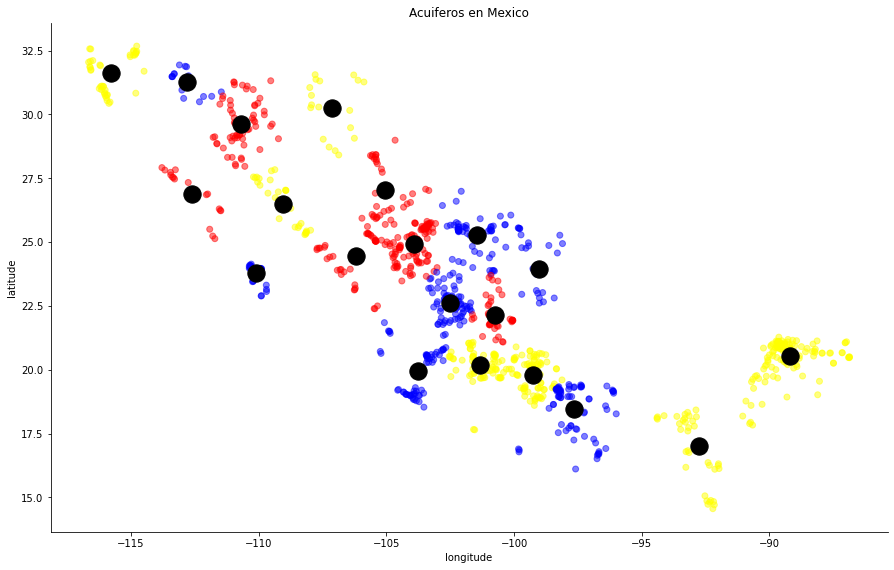

In [35]:
fig, gax = plt.subplots(figsize=(15,10))
colores = ['yellow','blue','red','yellow','blue','red','yellow','blue','red','yellow','blue','red','yellow','blue','red','yellow','blue','red','yellow','blue']
color_asig = []

for row in labels:
  color_asig.append(colores[row])


puntos_en_mapa.plot(ax=gax, color=color_asig, alpha = 0.5) 
puntos_centroides.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

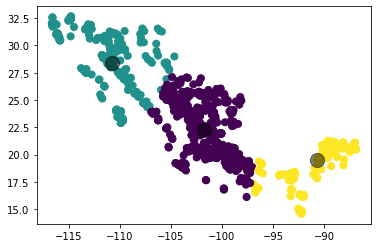

In [26]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Se agruparon los sitios por su ubicación en 3 grandes zonas del país.
<br><br>
Ahora se agruparán los sitios por su semáforo para determinar conjuntos de sitios cercanos con el mismo estado y encontrar patrones.

## Prueba 1 kmeans

one hot 


In [27]:
coor_semaf = df_sub[['LONGITUD', 'LATITUD']]
semaf = pd.get_dummies(df_semaforo['SEMAPHORE'])
coor_semaf = pd.concat([coor_semaf, semaf], axis='columns')
coor_semaf.head()

,LONGITUD,LATITUD,green,red,yellow
0,-102.02210,22.20887,1,0,0
1,-102.20075,21.99958,1,0,0
2,-102.28801,22.36685,0,1,0
3,-102.29449,22.18435,1,0,0
4,-110.24480,23.45138,0,1,0


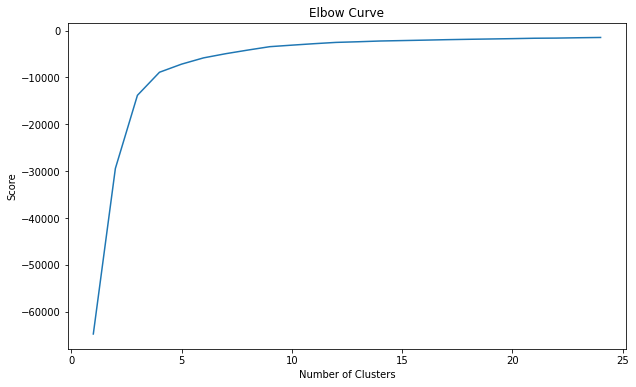

In [28]:
numero_de_closters = range(1,25) 
mi_kmeans = [KMeans(n_clusters=i, max_iter=1000) for i in numero_de_closters]
Y_axis = df_ubicacion[['LATITUD']]
calulo_kmeans = [mi_kmeans[i].fit(coor_semaf).score(coor_semaf) for i in range(len(mi_kmeans))]

plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=5).fit(coor_semaf)
labels = kmeans.predict(coor_semaf)

C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,2,3,4,Coordinates
0,-90.092716,19.650263,0.388889,0.086420,0.524691,POINT (-90.09272 19.65026)
1,-102.573540,24.198804,0.309211,0.559211,0.131579,POINT (-102.57354 24.19880)
2,-112.587985,30.316491,0.488550,0.297710,0.213740,POINT (-112.58799 30.31649)
3,-100.123770,19.817902,0.489164,0.312693,0.198142,POINT (-100.12377 19.81790)
4,-107.791999,25.853527,0.371622,0.425676,0.202703,POINT (-107.79200 25.85353)


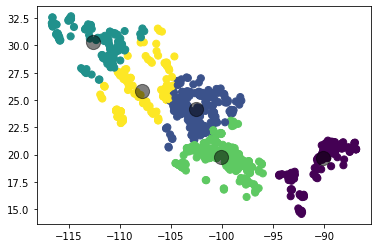

In [30]:
plt.scatter(coor_semaf.iloc[:, 0], coor_semaf.iloc[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## prueba 2 kmeasn

In [31]:
coor_semaf = df_sub[['LONGITUD', 'LATITUD']]
coor_semaf = pd.concat([coor_semaf, df_semaforo['SEMAPHORE']], axis='columns')
coor_semaf['SEMAPHORE'].replace(['yellow', 'red', 'green'], [0, 1, 2], inplace=True)
coor_semaf.head()

,LONGITUD,LATITUD,SEMAPHORE
0,-102.02210,22.20887,2
1,-102.20075,21.99958,2
2,-102.28801,22.36685,1
3,-102.29449,22.18435,2
4,-110.24480,23.45138,1


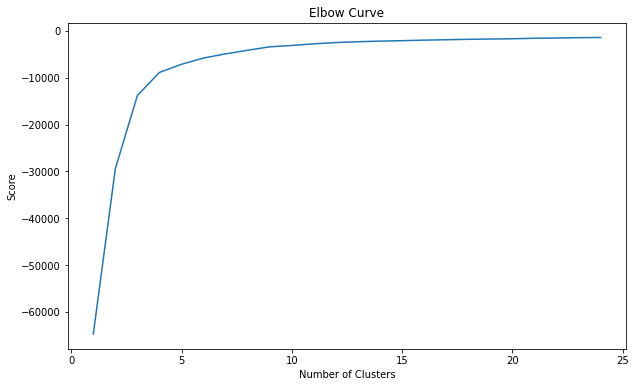

In [32]:
numero_de_closters = range(1,25) 
mi_kmeans = [KMeans(n_clusters=i, max_iter=1000) for i in numero_de_closters]
calulo_kmeans = [mi_kmeans[i].fit(coor_semaf).score(coor_semaf) for i in range(len(mi_kmeans))]

plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5).fit(coor_semaf)
labels = kmeans.predict(coor_semaf)

C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,2,Coordinates
0,-100.127886,19.842035,1.288344,POINT (-100.12789 19.84204)
1,-112.587985,30.316491,1.274809,POINT (-112.58799 30.31649)
2,-102.617394,24.230946,1.180921,POINT (-102.61739 24.23095)
3,-107.849456,25.856757,1.165517,POINT (-107.84946 25.85676)
4,-90.092716,19.650263,0.864198,POINT (-90.09272 19.65026)


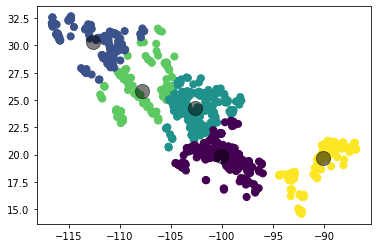

In [34]:
plt.scatter(coor_semaf.iloc[:, 0], coor_semaf.iloc[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Prueba 3 kmeans

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [36]:
coor_semaf = df_sub[['LONGITUD', 'LATITUD']]
coor_semaf = pd.concat([coor_semaf, df_semaforo['SEMAPHORE']], axis='columns')
#coor_semaf['SEMAPHORE'].replace(['yellow', 'red', 'green'], [0, 1, 2], inplace=True)
coor_semaf['SEMAPHORE'] = labelencoder.fit_transform(coor_semaf['SEMAPHORE'])
coor_semaf.head()
#X = coor_semaf[['LONGITUD', 'LATITUD']]
#Y = coor_semaf['SEMAPHORE']
#Y_split = pd.get_dummies(df_semaforo['SEMAPHORE'])
#Y_split.head()

,LONGITUD,LATITUD,SEMAPHORE
0,-102.02210,22.20887,0
1,-102.20075,21.99958,0
2,-102.28801,22.36685,1
3,-102.29449,22.18435,0
4,-110.24480,23.45138,1


In [37]:
semaf_yellow = coor_semaf[coor_semaf['SEMAPHORE']==0]
semaf_red = coor_semaf[coor_semaf['SEMAPHORE']==1]
semaf_green = coor_semaf[coor_semaf['SEMAPHORE']==2]

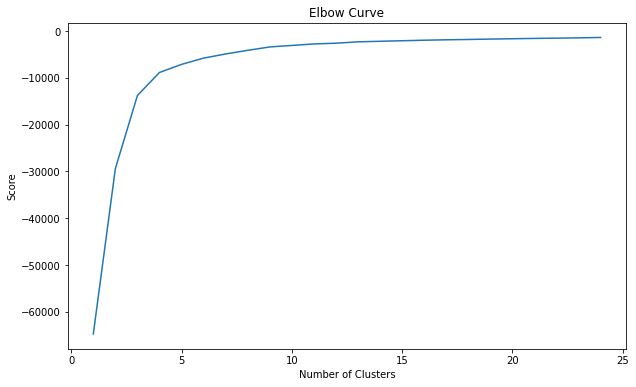

In [38]:
numero_de_closters = range(1,25) 
mi_kmeans = [KMeans(n_clusters=i, max_iter=1000) for i in numero_de_closters]
calulo_kmeans = [mi_kmeans[i].fit(coor_semaf).score(coor_semaf) for i in range(len(mi_kmeans))]

plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=5).fit(semaf_red)
labels = kmeans.predict(semaf_red)

C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,2,Coordinates
0,-103.852081,25.294110,1.0,POINT (-103.85208 25.29411)
1,-101.594496,21.248006,1.0,POINT (-101.59450 21.24801)
2,-111.689291,30.330306,1.0,POINT (-111.68929 30.33031)
3,-93.962528,18.352879,1.0,POINT (-93.96253 18.35288)
4,-109.504459,24.775152,1.0,POINT (-109.50446 24.77515)


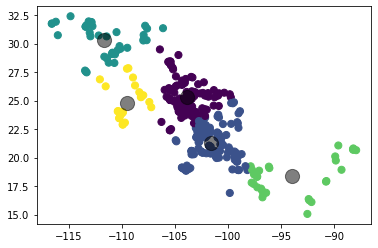

In [40]:
plt.scatter(semaf_red.iloc[:, 0], semaf_red.iloc[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [39]:
puntos_en_mapa['COLOR']= df_semaforo['SEMAFORO']
puntos_en_mapa['CLUSTER'] = labels
puntos_en_mapa

,LONGITUD,LATITUD,COORDENADAS,COLOR,CLUSTER
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde,4
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde,4
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo,4
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde,4
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo,16
...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo,19
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo,19
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo,10
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde,10


In [ ]:
nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == 0].copy()
nuevo_dataset.shape

In [42]:
lista_de_modas=[]

for i in range(0,20):
  nuevo_dataset = pd.DataFrame() 
  nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == i].copy()
  moda = nuevo_dataset['COLOR'].mode()[0] 
  lista_de_modas.append(moda) 

len(lista_de_modas)

20

In [43]:
puntos_centroides['MODA'] = lista_de_modas
puntos_centroides

,0,1,Coordinates,MODA
0,-99.255412,19.807499,POINT (-99.25541 19.80750),Verde
1,-112.807989,31.281434,POINT (-112.80799 31.28143),Rojo
2,-106.211481,24.466249,POINT (-106.21148 24.46625),Verde
3,-89.188374,20.546897,POINT (-89.18837 20.54690),Amarillo
4,-102.493113,22.604680,POINT (-102.49311 22.60468),Rojo
5,-110.677534,29.635458,POINT (-110.67753 29.63546),Verde
6,-92.761627,17.004097,POINT (-92.76163 17.00410),Verde
7,-97.649457,18.478355,POINT (-97.64946 18.47835),Verde
8,-112.615830,26.895082,POINT (-112.61583 26.89508),Verde
9,-115.780432,31.622931,POINT (-115.78043 31.62293),Amarillo


In [44]:
lista_gringa = []

for i in range(0,20):
  if lista_de_modas[i] == 'Verde':
    lista_gringa.append('green')
  if lista_de_modas[i] == 'Rojo':
    lista_gringa.append('red')
  if lista_de_modas[i] == 'Amarillo':
    lista_gringa.append('yellow')

len(lista_gringa)

20

In [45]:
lista_gringa_individual = []

for i in range(0,1068):
  if puntos_en_mapa.COLOR[i] == 'Verde':
    lista_gringa_individual.append('green')
  if puntos_en_mapa.COLOR[i] == 'Rojo':
    lista_gringa_individual.append('red')
  if puntos_en_mapa.COLOR[i] == 'Amarillo':
    lista_gringa_individual.append('yellow')

len(lista_gringa_individual)

1068

In [46]:
print(puntos_centroides)
print(puntos_en_mapa)

             0          1                  Coordinates      MODA
0   -99.255412  19.807499   POINT (-99.25541 19.80750)     Verde
1  -112.807989  31.281434  POINT (-112.80799 31.28143)      Rojo
2  -106.211481  24.466249  POINT (-106.21148 24.46625)     Verde
3   -89.188374  20.546897   POINT (-89.18837 20.54690)  Amarillo
4  -102.493113  22.604680  POINT (-102.49311 22.60468)      Rojo
5  -110.677534  29.635458  POINT (-110.67753 29.63546)     Verde
6   -92.761627  17.004097   POINT (-92.76163 17.00410)     Verde
7   -97.649457  18.478355   POINT (-97.64946 18.47835)     Verde
8  -112.615830  26.895082  POINT (-112.61583 26.89508)     Verde
9  -115.780432  31.622931  POINT (-115.78043 31.62293)  Amarillo
10 -101.448792  25.286330  POINT (-101.44879 25.28633)  Amarillo
11 -105.047199  27.042895  POINT (-105.04720 27.04290)      Rojo
12 -109.032816  26.492841  POINT (-109.03282 26.49284)  Amarillo
13 -103.764117  19.947591  POINT (-103.76412 19.94759)      Rojo
14 -103.903398  24.913672

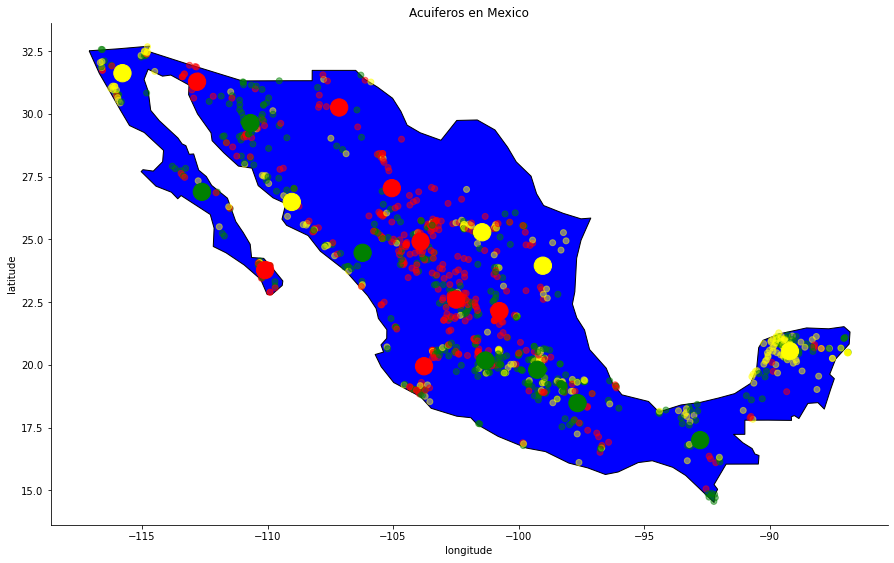

In [48]:
fig, gax = plt.subplots(figsize=(15,10))
color_asig = []
color_individual = puntos_en_mapa['COLOR']

for row in range(0,len(lista_gringa)):
  color_asig.append(lista_gringa[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='blue') #filtramos por pais

puntos_en_mapa.plot(ax=gax, color=lista_gringa_individual, alpha = 0.5) 
puntos_centroides.plot(ax=gax, color=color_asig, alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Acá obtenemos el valor por cada CLUSTER

In [49]:

df_sub_copy = df_sub.copy(deep=True)
df_sub_copy['CLUSTER'] = labels
_clusters = df_sub_copy.groupby('CLUSTER')['CLUSTER'].count()
print(_clusters)


CLUSTER
0      86
1      15
2      40
3     121
4      75
5      61
6      41
7      78
8      17
9      40
10     63
11     36
12     31
13     58
14    109
15     18
16     32
17     47
18     70
19     30
Name: CLUSTER, dtype: int64
